In [54]:
#example source: https://github.com/ca-scribner/lrl
from lrl import environments, solvers
from lrl.utils import plotting
from matplotlib import pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(funcName)s - %(levelname)s - %(message)s',
                    level=logging.INFO, datefmt='%H:%M:%S')
logger = logging.getLogger(__name__)

<AxesSubplot:>

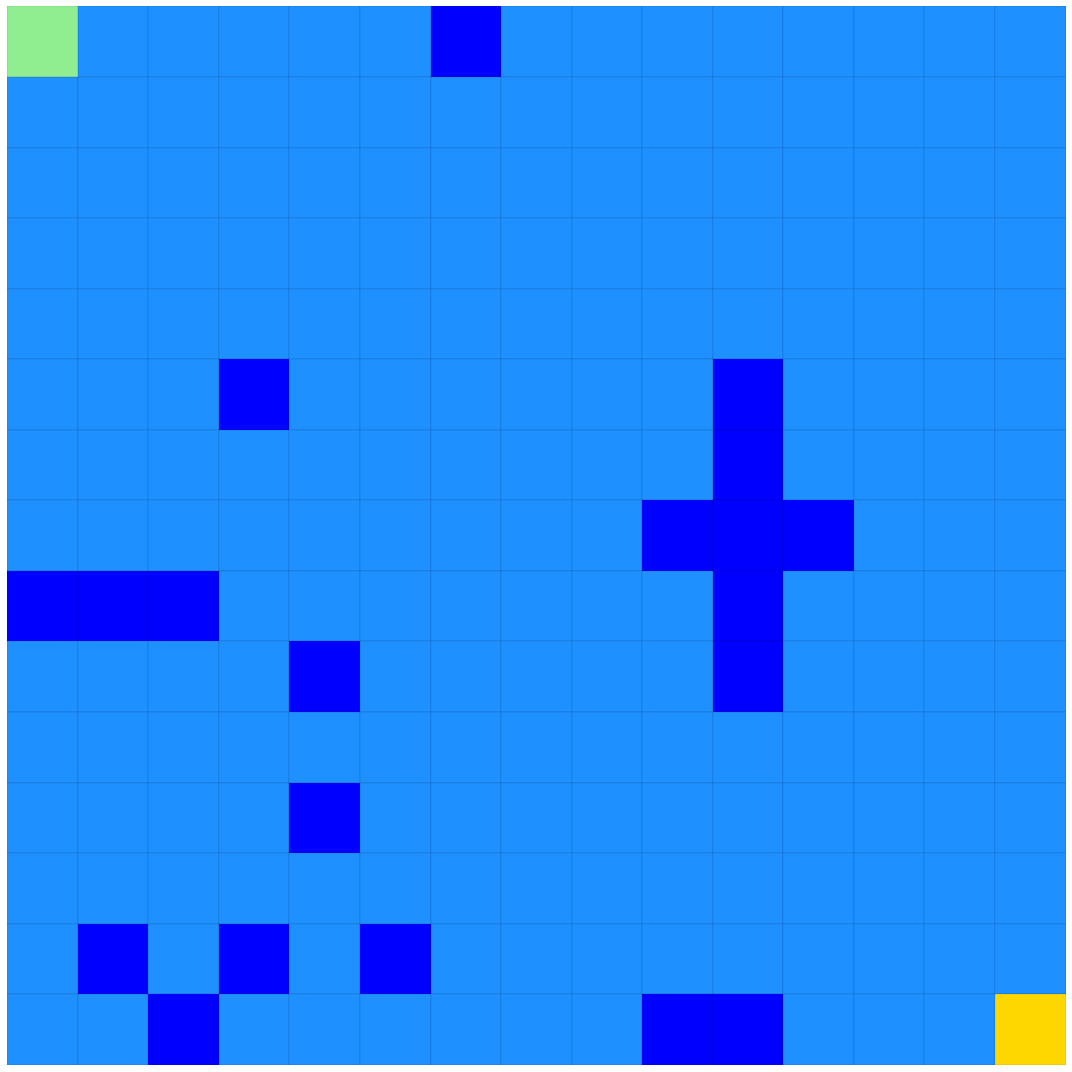

In [55]:
lake = environments.frozen_lake.RewardingFrozenLakeEnv(map_name='15x15', is_slippery=True)
plotting.plot_env(env=lake)

**Ice is light blue - holes are dark blue. Start from and Goal is yellow**

## Value Iteration

In [64]:
lake_vi = solvers.ValueIteration(env=lake)
lake_vi.iterate_to_convergence()
scoring_data = lake_vi.score_policy(iters=1500)

13:57:36 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver iterating to convergence (Max delta in value function < 0.001 or iters>500)
13:57:37 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver converged to solution in 41 iterations


In [65]:
print(f'type(scoring_data) = {type(scoring_data)}')
scoring_data_df = scoring_data.to_dataframe(include_episodes=True)
scoring_data_df.head()

type(scoring_data) = <class 'lrl.data_stores.data_stores.EpisodeStatistics'>


,episode_index,reward,steps,terminal,reward_mean,reward_median,reward_std,reward_min,reward_max,steps_mean,steps_median,steps_std,steps_min,steps_max,terminal_fraction,episodes
0,0,0.67,35,True,0.670000,0.67,0.000000,0.67,0.67,35.000000,35.0,0.000000,35,35,1.0,"[0, 1, 16, 17, 32, 33, 18, 19, 34, 49, 64, 65,..."
1,1,0.67,35,True,0.670000,0.67,0.000000,0.67,0.67,35.000000,35.0,0.000000,35,35,1.0,"[0, 1, 2, 3, 18, 3, 18, 19, 34, 33, 34, 49, 50..."
2,2,0.69,33,True,0.676667,0.67,0.009428,0.67,0.69,34.333333,35.0,0.942809,33,35,1.0,"[0, 15, 30, 31, 32, 33, 34, 49, 34, 49, 50, 51..."
3,3,0.67,35,True,0.675000,0.67,0.008660,0.67,0.69,34.500000,35.0,0.866025,33,35,1.0,"[0, 1, 2, 3, 18, 33, 48, 49, 34, 49, 50, 65, 8..."
4,4,0.61,41,True,0.662000,0.67,0.027129,0.61,0.69,35.800000,35.0,2.712932,33,41,1.0,"[0, 1, 2, 3, 18, 19, 34, 49, 50, 65, 80, 79, 8..."


In [66]:
print(f'The reward obtained in the 1499th episode was {scoring_data_df.loc[1499, "reward"]}')
print(f'The mean reward obtained in the 0-1499 episode (inclusive) was {scoring_data_df.loc[1499, "reward_mean"]}')

The reward obtained in the 1499th episode was 0.6699999999999999
The mean reward obtained in the 0-1499 episode (inclusive) was 0.6328933333333333


In [67]:
i = 0
print(f'Location index={i} is at (x, y) location {lake.index_to_state[i]} (where x=0 is left and y=0 is bot)')
loc = (0, 0)
print(f'And going the other way, location {loc} is index {lake.state_to_index[loc]}')

Location index=0 is at (x, y) location (0, 14) (where x=0 is left and y=0 is bot)
And going the other way, location (0, 0) is index 210


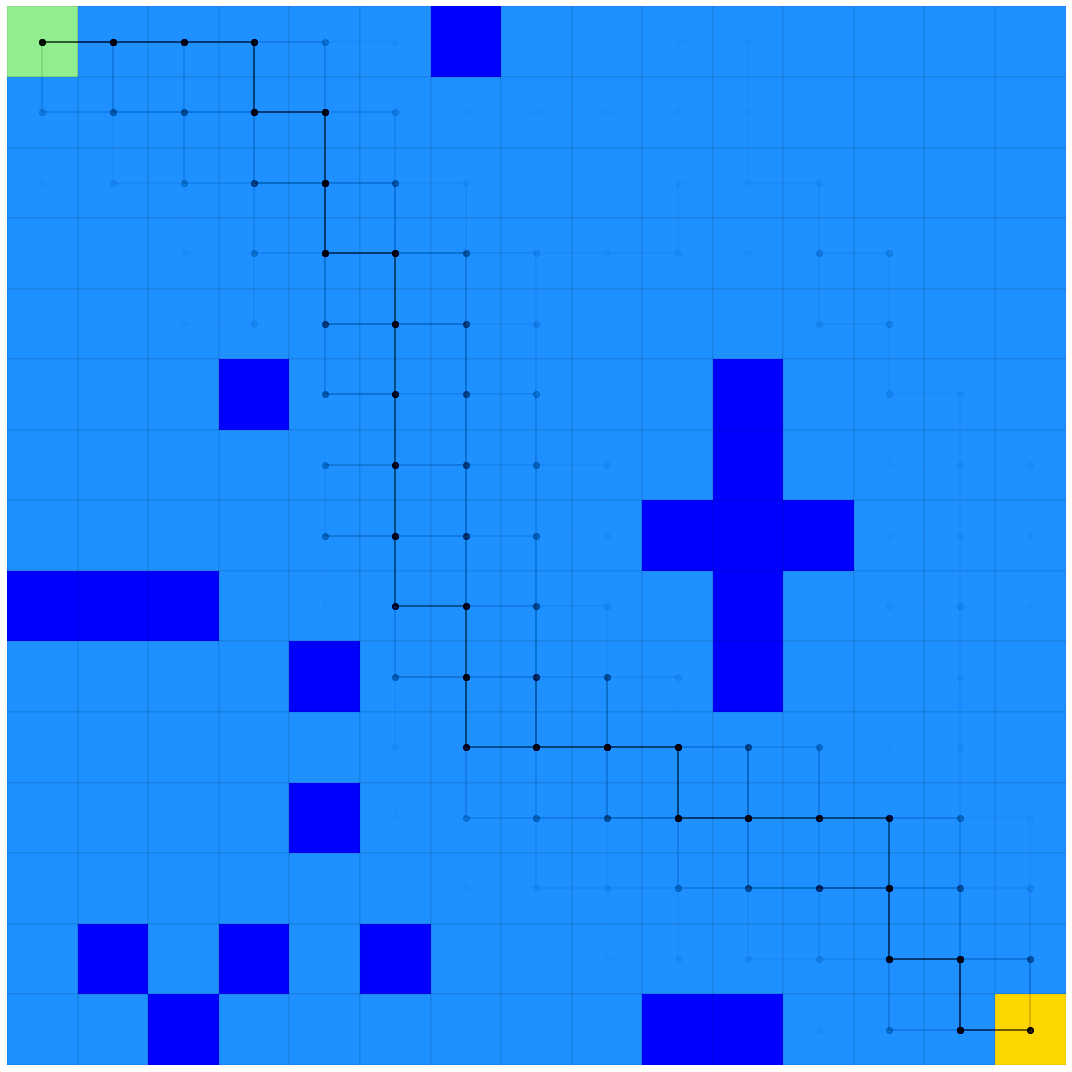

In [68]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data.episodes, env=lake, max_episodes=100, )

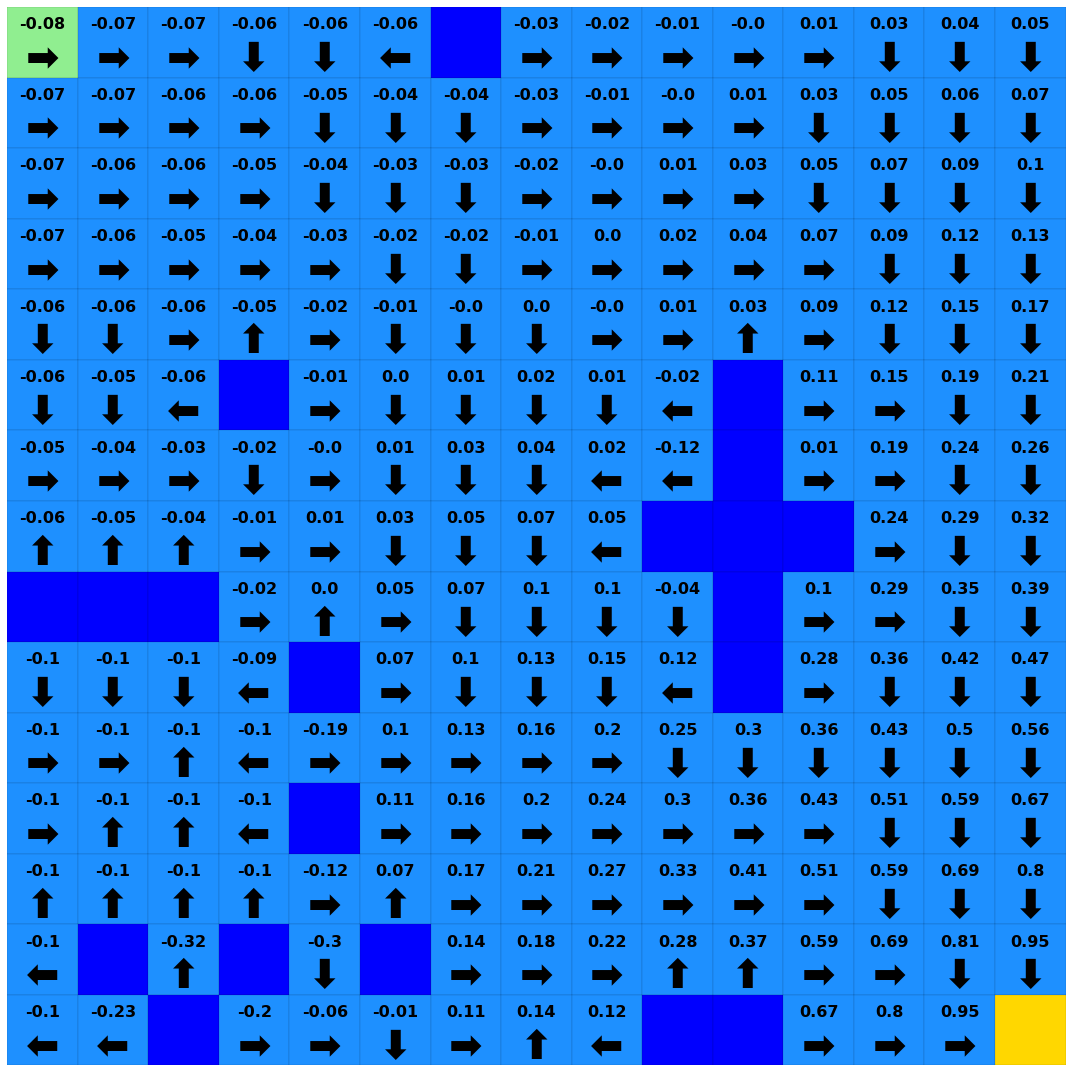

In [69]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_vi)

In [70]:
df_vi_time = lake_vi.iteration_data.to_dataframe()
df_vi_time.tail()

,iteration,time,delta_max,delta_mean,policy_changes,converged
36,36,0.002724,0.002388,0.000214,1,False
37,37,0.002750,0.001776,0.000167,0,False
38,38,0.002890,0.001540,0.000138,0,False
39,39,0.002907,0.001135,0.000110,0,False
40,40,0.002923,0.000915,0.000093,0,True


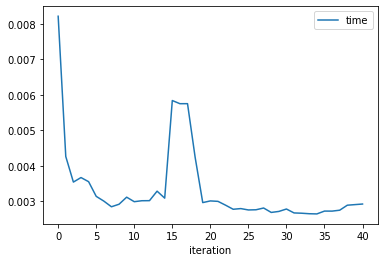

In [71]:
df_vi_time.plot(kind = 'line', x = 'iteration', y = 'time')

plt.show()

## Policy Iteration

In [94]:
lake_pi = solvers.PolicyIteration(env=lake)
lake_pi.iterate_to_convergence()
scoring_data_pi = lake_pi.score_policy(iters=1500)

14:02:16 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver iterating to convergence (1 iteration without change in policy or iters>500)
14:02:16 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver converged to solution in 9 iterations


In [95]:
scoring_data_pi = scoring_data_pi.to_dataframe(include_episodes=True)
print(f'The reward obtained in the 1499th episode was {scoring_data_pi.loc[1499, "reward"]}')
print(f'The mean reward obtained in the 0-1499 episode (inclusive) was {scoring_data_pi.loc[1499, "reward_mean"]}')

The reward obtained in the 1499th episode was 0.69
The mean reward obtained in the 0-1499 episode (inclusive) was 0.6341133333333332


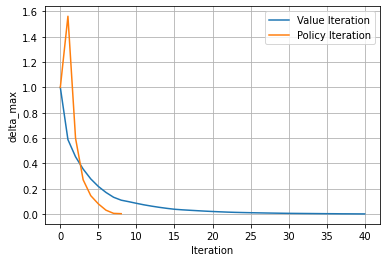

In [96]:
# (these are simple convenience functions for plotting, basically just recipes.  See the plotting API)
# We can pass the solver..
ax = plotting.plot_solver_convergence(lake_vi,  y='delta_max', x='iteration',label='Value Iteration')

# Or going a little deeper into the API, with style being passed to matplotlib's plot function...
ax = plotting.plot_solver_convergence_from_df(lake_pi.iteration_data.to_dataframe(), y='delta_max', x='iteration', 
                                              ax=ax, label='Policy Iteration')
plt.grid()
ax.legend()

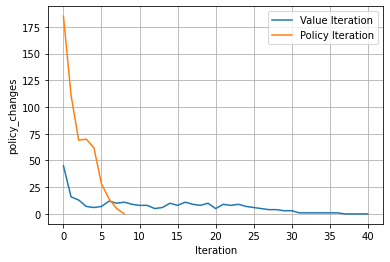

In [97]:
# (these are simple convenience functions for plotting, basically just recipes.  See the plotting API)
# We can pass the solver..
ax = plotting.plot_solver_convergence(lake_vi, y='policy_changes', label='Value Iteration')

# Or going a little deeper into the API...
ax = plotting.plot_solver_convergence_from_df(lake_pi.iteration_data.to_dataframe(), y='policy_changes', x='iteration', 
                                              ax=ax, label='Policy Iteration')
plt.grid()
ax.legend()

Total solution time for Value Iteration (excludes any scoring time):  0.14s
Total solution time for Policy Iteration (excludes any scoring time): 0.31s


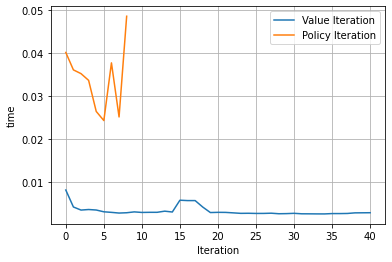

In [98]:
# (these are simple convenience functions for plotting, basically just recipes.  See the plotting API)
# We can pass the solver..
ax = plotting.plot_solver_convergence(lake_vi, y='time', label='Value Iteration')

# Or going a little deeper into the API...
ax = plotting.plot_solver_convergence_from_df(lake_pi.iteration_data.to_dataframe(), y='time', x='iteration', ax=ax, label='Policy Iteration')

ax.legend()

print(f'Total solution time for Value Iteration (excludes any scoring time):  {lake_vi.iteration_data.to_dataframe().loc[:, "time"].sum():.2f}s')
print(f'Total solution time for Policy Iteration (excludes any scoring time): {lake_pi.iteration_data.to_dataframe().loc[:, "time"].sum():.2f}s')
plt.grid()

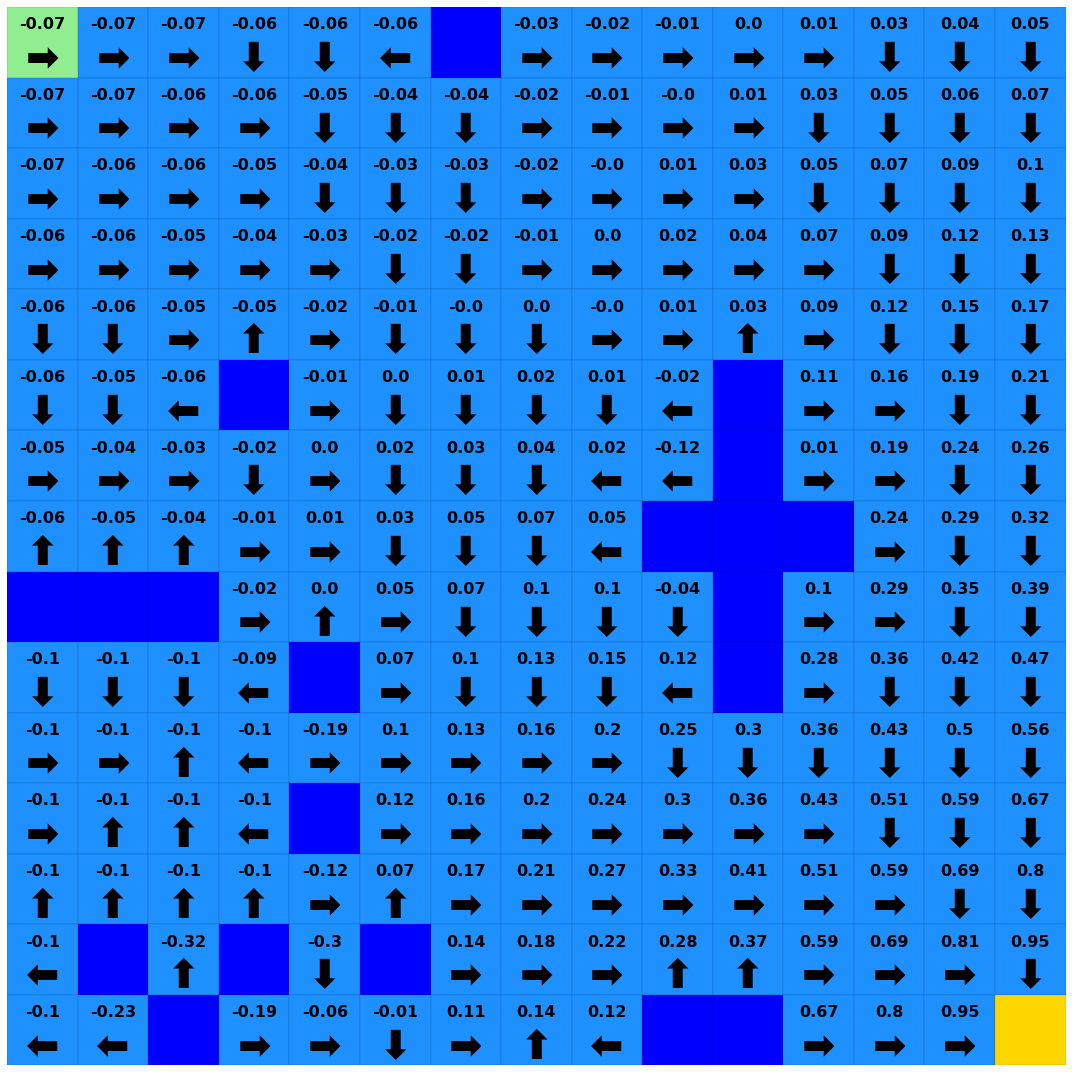

In [99]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_pi)

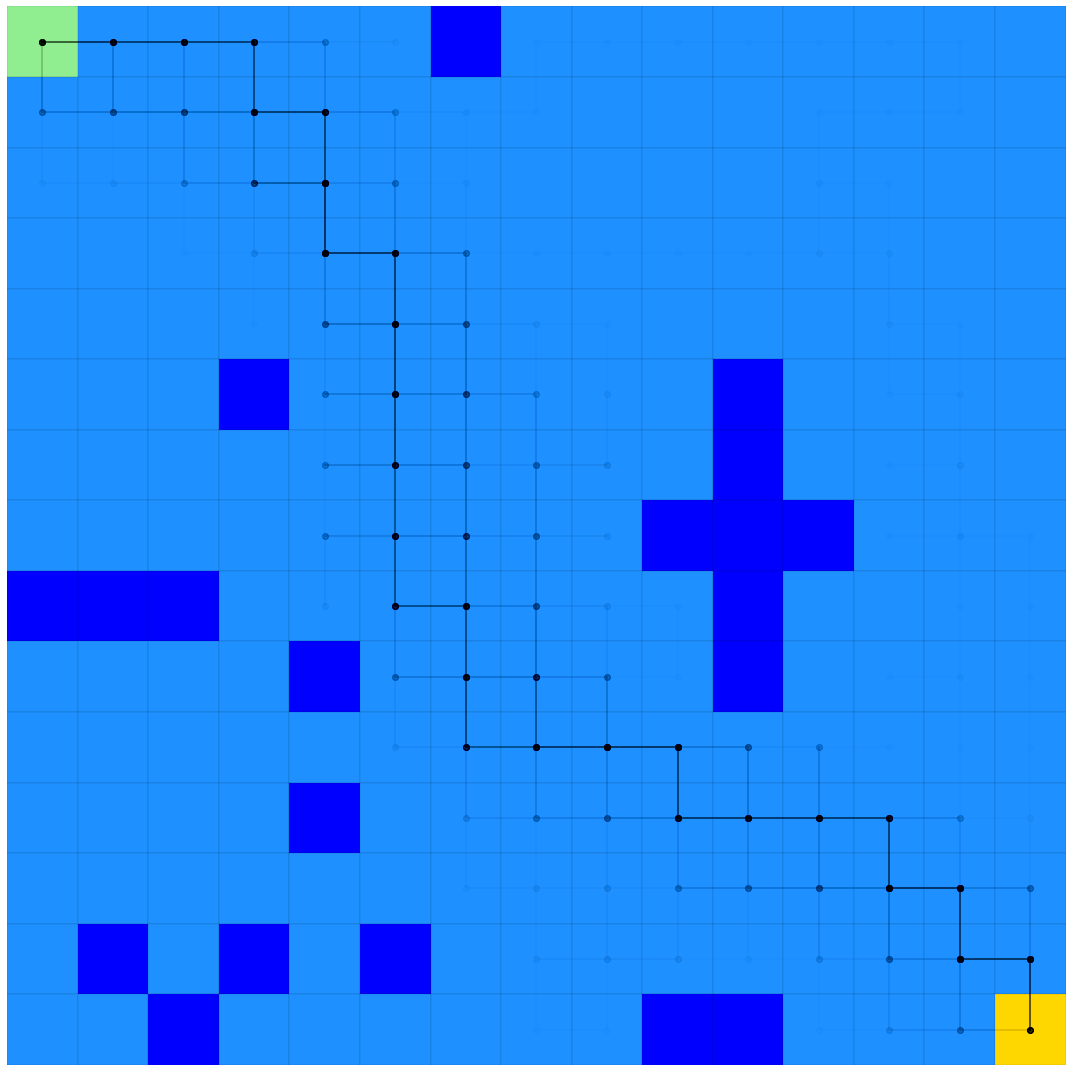

In [100]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data_pi.episodes, env=lake, max_episodes=100, )

## Q Learning

In [106]:
# Let's be explicit with our QLearning settings for alpha and epsilon
alpha = 0.1  # Constant alpha during learning

# Decay function for epsilon (see QLearning() and decay_functions() in documentation for syntax)
# Decay epsilon linearly from 0.2 at timestep (iteration) 0 to 0.05 at timestep 1500, 
# keeping constant at 0.05 for ts>1500
epsilon = {
    'type': 'linear',
    'initial_value': 0.2, 
    'initial_timestep': 0,
    'final_value': 0.05, 
    'final_timestep': 1500
}

# Above PI/VI used the default gamma, but we will specify one here
gamma = 0.9

# Convergence is kinda tough to interpret automatically for Q-Learning.  One good way to monitor convergence is to
# evaluate how good the greedy policy at a given point in the solution is and decide if it is still improving.
# We can enable this with score_while_training (available for Value and Policy Iteration as well)
# NOTE: During scoring runs, the solver is acting greedily and NOT learning from the environment.  These are separate
#       runs solely used to estimate solution progress
# NOTE: Scoring every 50 iterations is probably a bit much, but used to show a nice plot below.  The default 500/500 
#       is probably a better general guidance
score_while_training = {
    'n_trains_per_eval': 50,  # Number of training episodes we run per attempt to score the greedy policy 
                               # (eg: Here we do a scoring run after every 500 training episodes, where training episodes
                               # are the usual epsilon-greedy exploration episodes)
    'n_evals': 250,  # Number of times we run through the env with the greedy policy whenever we score
}
# score_while_training = True  # This calls the default settings, which are also 500/500 like above

lake_ql = solvers.QLearning(env=lake, alpha=alpha, epsilon=epsilon, gamma=gamma,
                          max_iters=5000, score_while_training=score_while_training)

lake_ql.iterate_to_convergence()
scoring_data_ql = lake_ql.score_policy(iters=5000)

14:04:19 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver iterating to convergence (20 episodes with max delta in Q function < 0.1 or iters>5000)
14:04:19 - lrl.solvers.learners - iterate - INFO - Performing iteration (episode) 0 of Q-Learning
14:04:19 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy being scored 250 times at iteration 50
14:04:19 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy achieved: r_mean = -1.2230000000000005, r_max = -1.0000000000000007
14:04:20 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy being scored 250 times at iteration 100
14:04:20 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy achieved: r_mean = -1.1696000000000004, r_max = -1.0000000000000007
14:04:21 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy being scored 250 times at iteration 150
14:04:22 - lrl.solvers.base_

<AxesSubplot:xlabel='iteration', ylabel='policy_changes'>

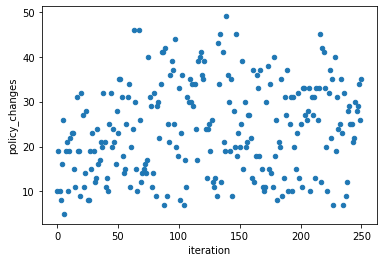

In [107]:
lake_ql_iter_df = lake_ql.iteration_data.to_dataframe()
lake_ql_iter_df.plot(x='iteration', y='policy_changes', kind='scatter', )

In [108]:
lake_ql_intermediate_scoring_df = lake_ql.scoring_summary.to_dataframe()
lake_ql_intermediate_scoring_df

,iteration,reward_mean,reward_median,reward_std,reward_min,reward_max,steps_mean,steps_median,steps_std,steps_min,steps_max
0,50,-1.22300,-1.0,0.339719,-1.99,-1.0,90.036,101.0,20.221442,17,101
1,100,-1.16960,-1.0,0.284638,-1.99,-1.0,88.656,101.0,22.101440,19,101
2,150,-1.01436,-1.0,0.106372,-1.95,-1.0,100.456,101.0,5.158300,28,101
3,200,-1.01328,-1.0,0.105222,-1.96,-1.0,100.744,101.0,2.507282,68,101
4,250,-1.05444,-1.0,0.204927,-1.96,-1.0,99.712,101.0,6.040286,46,101


Text(0.5, 0, 'Iterations')

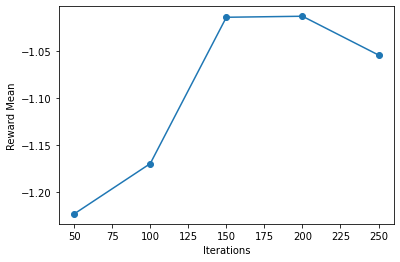

In [109]:
plt.plot(lake_ql_intermediate_scoring_df.loc[:, 'iteration'], lake_ql_intermediate_scoring_df.loc[:, 'reward_mean'], '-o')
plt.ylabel('Reward Mean')
plt.xlabel('Iterations')

Text(0.5, 1.0, 'Frozen Lake - Convergence Iterations')

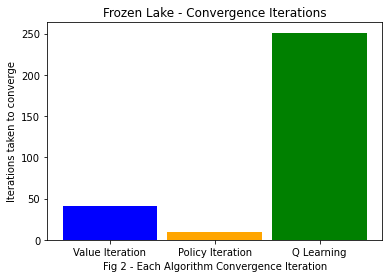

In [63]:
plt.bar([0,1,2], height= [41,9, 251], width=0.9, color=['blue', 'orange','green']) 
plt.xticks([0,1,2], ['Value Iteration', 'Policy Iteration', 'Q Learning'])
plt.ylabel('Iterations taken to converge')
plt.xlabel('Fig 2 - Each Algorithm Convergence Iteration')
plt.title('Frozen Lake - Convergence Iterations')

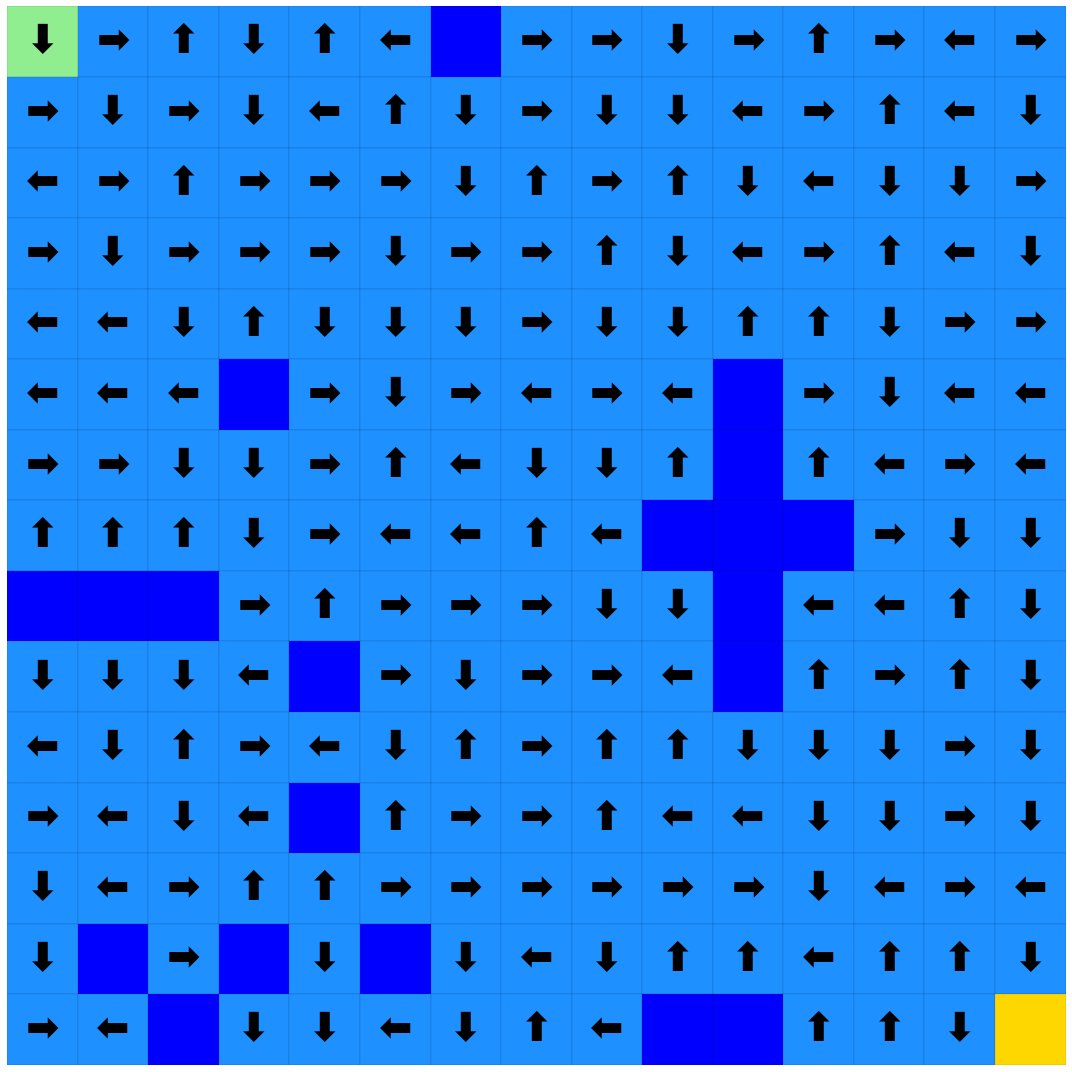

In [61]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_ql)

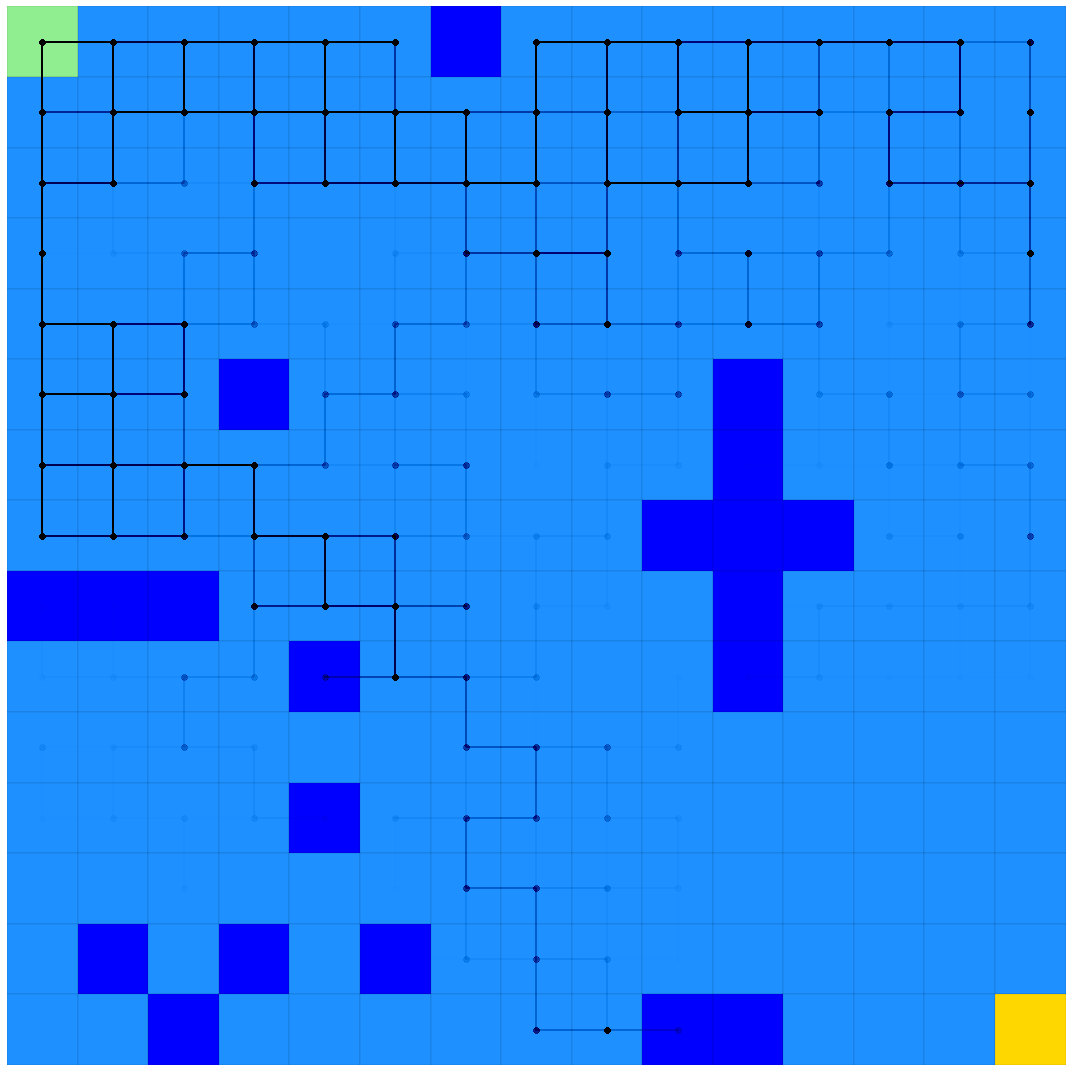

In [31]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data_ql.episodes, env=lake, max_episodes=1000, )

In [47]:
df_ql= lake_ql.iteration_data.to_dataframe()
df_ql.tail()

,iteration,time,delta_max,policy_changes,alpha,epsilon,converged
246,246,0.016484,0.001823,29,0.1,0.1754,False
247,247,0.008732,0.073603,14,0.1,0.1753,False
248,248,0.016439,0.001464,26,0.1,0.1752,False
249,249,0.018101,0.001377,33,0.1,0.1751,False
250,250,0.018894,0.001492,34,0.1,0.1750,True


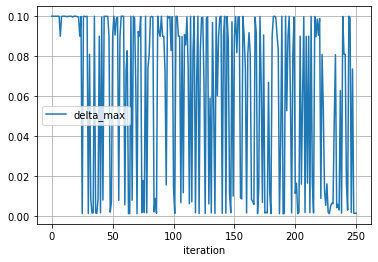

In [48]:
df_ql.plot(kind = 'line', x = 'iteration', y = 'delta_max')
plt.grid()
plt.show()

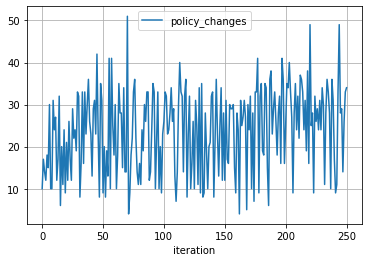

In [49]:
df_ql.plot(kind = 'line', x = 'iteration', y = 'policy_changes')
plt.grid()
plt.show()

In [113]:
scoring_data_ql_df = scoring_data_ql.to_dataframe(include_episodes=True)
print(f'The reward obtained in the 1499th episode was {scoring_data_ql_df.loc[2500, "reward"]}')
print(f'The mean reward obtained in the 0-1499 episode (inclusive) was {scoring_data_ql_df.loc[2500, "reward_mean"]}')

The reward obtained in the 1499th episode was -1.0000000000000007
The mean reward obtained in the 0-1499 episode (inclusive) was -1.1038944422231114


14:54:43 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver iterating to convergence (20 episodes with max delta in Q function < 0.1 or iters>5000)
14:54:43 - lrl.solvers.learners - iterate - INFO - Performing iteration (episode) 0 of Q-Learning
14:54:44 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy being scored 500 times at iteration 100
14:54:44 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy achieved: r_mean = -1.4269200000000006, r_max = -1.0000000000000007
14:54:45 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy being scored 500 times at iteration 200
14:54:46 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Current greedy policy achieved: r_mean = -1.0556200000000004, r_max = -1.0000000000000007
14:54:47 - lrl.solvers.base_solver - iterate_to_convergence - INFO - Solver converged to solution in 251 iterations


<AxesSubplot:xlabel='iteration', ylabel='policy_changes'>

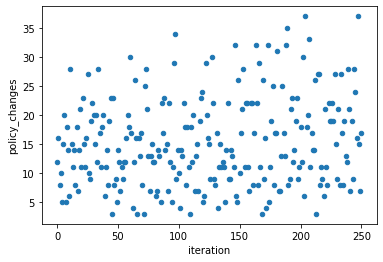

In [115]:
# Let's be explicit with our QLearning settings for alpha and epsilon
alpha = 0.1  # Constant alpha during learning

# Decay function for epsilon (see QLearning() and decay_functions() in documentation for syntax)
# Decay epsilon linearly from 0.2 at timestep (iteration) 0 to 0.05 at timestep 1500, 
# keeping constant at 0.05 for ts>1500
epsilon = {
    'type': 'linear',
    'initial_value': 0.5, 
    'initial_timestep': 0,
    'final_value': 0.05, 
    'final_timestep': 1500
}

# Above PI/VI used the default gamma, but we will specify one here
gamma = 0.9

# Convergence is kinda tough to interpret automatically for Q-Learning.  One good way to monitor convergence is to
# evaluate how good the greedy policy at a given point in the solution is and decide if it is still improving.
# We can enable this with score_while_training (available for Value and Policy Iteration as well)
# NOTE: During scoring runs, the solver is acting greedily and NOT learning from the environment.  These are separate
#       runs solely used to estimate solution progress
# NOTE: Scoring every 50 iterations is probably a bit much, but used to show a nice plot below.  The default 500/500 
#       is probably a better general guidance
score_while_training = {
    'n_trains_per_eval': 100,  # Number of training episodes we run per attempt to score the greedy policy 
                               # (eg: Here we do a scoring run after every 500 training episodes, where training episodes
                               # are the usual epsilon-greedy exploration episodes)
    'n_evals': 500,  # Number of times we run through the env with the greedy policy whenever we score
}
# score_while_training = True  # This calls the default settings, which are also 500/500 like above

lake_ql_new = solvers.QLearning(env=lake, alpha=alpha, epsilon=epsilon, gamma=gamma,
                          max_iters=5000, score_while_training=score_while_training)

lake_ql_new.iterate_to_convergence()
scoring_data_ql_new = lake_ql_new.score_policy(iters=5000)
lake_ql_iter_df_new = lake_ql_new.iteration_data.to_dataframe()
lake_ql_iter_df_new.plot(x='iteration', y='policy_changes', kind='scatter', )